In [32]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import pickle
from PIL import Image
import matplotlib.pyplot as plt

from Butterfly_identification.preprocessbutterfly import get_data, feature_engineering

In [33]:
our_model = load_model('../../API_FTW')

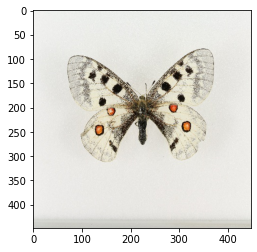

In [34]:
img = plt.imread('../../ETHZ_ENT01_2018_03_22_136749.JPG')
plt.imshow(img)

In [35]:
def prediction (img): 
    img = preprocess_input(img)
    img = np.expand_dims(img,axis = 0)
    return img

In [36]:
img = prediction(img)
assert img.shape[0] == 1
resultat = pd.DataFrame(our_model.predict(img)).T
# Load prediction table of species
infile = open("../../species_table",'rb')
table = pickle.load(infile)
# merge result and total
table = pd.DataFrame(table).reset_index(drop = True)
total = resultat.merge(table, right_index=True, left_index=True)
total.columns = ['score', 'species']
total_sort = total.sort_values(ascending=False, by = 'score').head(5)

A partir du dossier (3 images par espèce), faire une fonction qui prend les espèces retenu de la prédiction et qui ressort les images ou un pickle avec les images

# Modifier le dossier

In [ ]:
import os
import shutil
import Butterfly_identification.preprocessbutterfly as preproc
if __name__ == "__main__" :
    df_train, df_val, df_test = preproc.get_data(data=["train", "val", "test"])
    print(">>>>>>>>>>>>>>>>>>>>>>>>        Data loaded        <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    df_train, df_val, df_test = preproc.feature_engineering(df_train, df_val, df_test)
    print(">>>>>>>>>>>>>>>>>>>>>>>>      Preprocess done      <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    parts =  os.getcwd().split("/")
    ABS_PATH = "/" + parts[1] + "/" + parts[2] + "/"
    os.chdir(ABS_PATH + "code/Em3line/Butterfly_identification/raw_data/")
    data_dir = ABS_PATH + "code/Em3line/Butterfly_identification/raw_data/"
    folder_name_docker = 'Docker/'
    os.mkdir(f'{data_dir + folder_name_docker}')
    print(f">>>>>>>>>>>>>>>>>>>>>>>>    {folder_name_docker} created   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    folder_name = 'Photos/'
    os.mkdir(f'{data_dir + folder_name_docker + folder_name}')
    print(f">>>>>>>>>>>>>>>>>>>>>>>>    {folder_name} created   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    path = data_dir + folder_name_docker + folder_name
    for folder in list(df_train["species"].unique()):
        os.mkdir(f"{path + folder}")
    print(f">>>>>>>>>>>>>>>>>>>>>>>>    Species folders created   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    images_dir = ABS_PATH + "code/Em3line/Butterfly_identification/raw_data/IMG_labels/"            
    for specie in list(df_train["species"].unique()):
        path_to_image = df_train.loc[df_train['species'] == specie, 'image_path'].sample(3)
        for image in path_to_image :
            old_path = images_dir + image
            new_path = path + image
            shutil.copyfile(old_path,new_path)       
    print(f">>>>>>>>>>>>>>>>>>>>>>>>   3 images by species copied   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
    print(f">>>>>>>>>>>>>>>>>>>>>>>>   All done. Go check !   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
        

# Fonction

## Prediction

In [37]:
total_sort

,score,species
211,0.644719,Parnassius_apollonius
150,0.137077,Parnassius_nomion
209,0.088380,Parnassius_actius
216,0.086437,Parnassius_bremeri
181,0.018271,Parnassius_tianschanicus


## Get data

In [38]:
df_train, df_val, df_test = preproc.get_data(data=["train", "val", "test"])
print(">>>>>>>>>>>>>>>>>>>>>>>>        Data loaded        <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
df_train, df_val, df_test = preproc.feature_engineering(df_train, df_val, df_test)
print(">>>>>>>>>>>>>>>>>>>>>>>>      Preprocess done      <<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

>>>>>>>>>>>>>>>>>>>>>>>>        Data loaded        <<<<<<<<<<<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>>>>>>>>>      Preprocess done      <<<<<<<<<<<<<<<<<<<<<<<<<<<<<


## Select pictures (n photos from n species)

In [43]:
df = df_train
data_to_sample = df.loc[df['species'] == 'Parnassius_apollo', 'image_path']
data_to_sample = '../raw_data/Docker/Photos/' + data_to_sample

In [44]:
plt.imread(Image.open(data_to_sample[10]))

FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/Docker/Photos/Parnassius_apollo/ETHZ_ENT01_2017_03_15_003167.JPG'

In [280]:
species = 'Parnassius_apollo'
df = df_train
data_to_sample = df.loc[df['species'] == species, 'image_path']
data_to_sample = '../raw_data/IMG_labels/Train/' + data_to_sample
sampling = data_to_sample.sample(3)

In [286]:
sampling[0]

'../raw_data/IMG_labels/Parnassius_apollo/ETHZ_ENT01_2017_03_15_003154.JPG'

In [25]:
plt.imshow(Image.open(sampling[0]))

NameError: name 'plt' is not defined

In [287]:
def find_picture(species, df, nb_image = 3):
    data_to_sample = df.loc[df['species'] == species, 'image_path']
    data_to_sample = '../raw_data/IMG_labels/Train/' + data_to_sample
    sampling = data_to_sample.sample(nb_image)
    fig, ax = plt.subplots(figsize=(7, 3))
    for i,j in enumerate(sampling) :
        plt.subplot(1,len(sampling),i+1)
        img = Image.open(j)
        fig = plt.imshow(img)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    return fig

In [ ]:
def find_picture(species, df, nb_image = 3):
    data_to_sample = df.loc[df['species'] == species, 'image_path']
    fig, ax = plt.subplots(figsize=(7, 3))
    for i,j in enumerate(data_to_sample) :
        plt.subplot(1,len(sampling),i+1)
        img = Image.open('../raw_data/IMG_labels/'j)
        fig = plt.imshow(img)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    return fig

In [248]:
df_train, df_val, df_test = get_data()
df_train, df_val, df_test = feature_engineering(df_train, df_val,df_test)

In [276]:
img = Image.open('../raw_data/IGM_labels/Train/Parnassius_apollonius/ETHZ_ENT01_2018_03_12_133969.JPG')

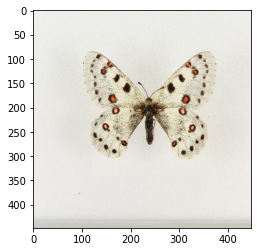

In [277]:
plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/IMG_labels/Train/Parnassius_apollonius/ETHZ_ENT01_2018_03_12_133962.JPG'

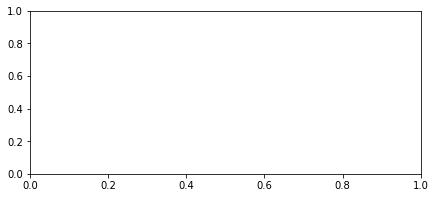

In [288]:
for i in total_sort['species']:
    find_picture(i, df_train, 1)

# Pickle

In [ ]:
import pickle
file = open('model.pkl','wb')
pickle.dump(images_predict, file)
file.close()